<a href="https://colab.research.google.com/github/Mubashar-Bashir/Hackathone/blob/main/vehicle_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Number Plate Detection from Blurry Images
This notebook demonstrates how to upscale and deblur images taken from CCTV cameras and apply Optical Character Recognition (OCR) to detect vehicle number plates.

### Step 1: Load the Image

In [2]:
pwd

'/content'

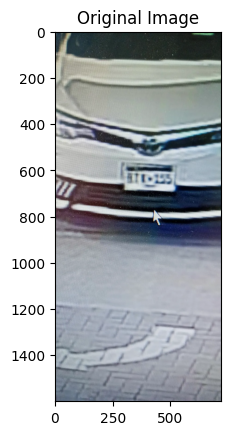

In [3]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### Step 2: Upscale the Image (Super-Resolution)

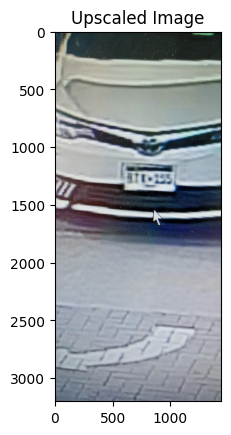

In [4]:
# Upscale the image using interpolation or a pre-trained deep learning model
def upscale_image(image, scale_factor=2):
    # Use cv2 INTER_CUBIC for high-quality upscaling
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Upscale the image by 2x
upscaled_img = upscale_image(img, scale_factor=2)
plt.imshow(cv2.cvtColor(upscaled_img, cv2.COLOR_BGR2RGB))
plt.title('Upscaled Image')
plt.show()

### Step 3: Deblurring the Image

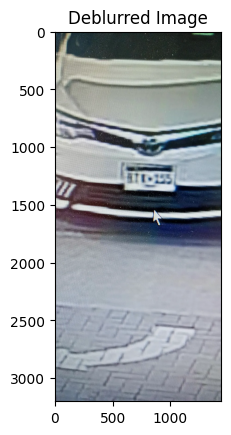

In [5]:
# Apply deblurring filter
def deblur_image(image):
    # Kernel for deblurring
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    deblurred_img = cv2.filter2D(image, -1, kernel)
    return deblurred_img

# Deblur the image
deblurred_img = deblur_image(upscaled_img)
plt.imshow(cv2.cvtColor(deblurred_img, cv2.COLOR_BGR2RGB))
plt.title('Deblurred Image')
plt.show()

### Step 4: Apply OCR to Detect the Number Plate

In [7]:
# prompt: pip install pytesseract

!pip install pytesseract


In [8]:
# Apply OCR using Tesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Update path if needed

def detect_number_plate(image):
    # Convert image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Perform OCR
    text = pytesseract.image_to_string(gray_img, config='--psm 8')  # psm 8 treats it as a single word (useful for number plates)
    return text.strip()

# Detect number plate
detected_text = detect_number_plate(deblurred_img)
print('Detected Number Plate:', detected_text)

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

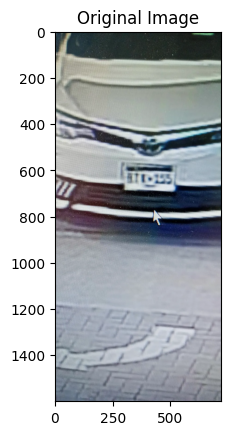

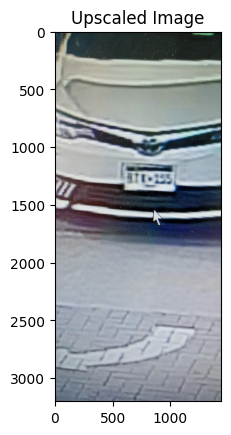

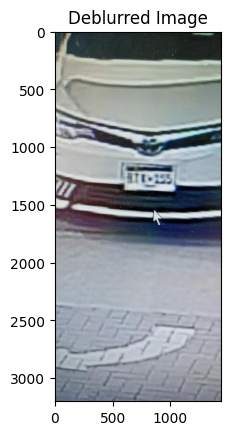

Detected Number Plate: =


In [9]:
# prompt: correct this above and resolve the issue

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Install pytesseract if not already installed
!sudo apt install tesseract-ocr
!pip install pytesseract

# Load the image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# ### Step 2: Upscale the Image (Super-Resolution)
# Upscale the image using interpolation or a pre-trained deep learning model
def upscale_image(image, scale_factor=2):
    # Use cv2 INTER_CUBIC for high-quality upscaling
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Upscale the image by 2x
upscaled_img = upscale_image(img, scale_factor=2)
plt.imshow(cv2.cvtColor(upscaled_img, cv2.COLOR_BGR2RGB))
plt.title('Upscaled Image')
plt.show()

# ### Step 3: Deblurring the Image
# Apply deblurring filter
def deblur_image(image):
    # Gaussian Blur for deblurring
    deblurred_img = cv2.GaussianBlur(image, (5, 5), 0)
    return deblurred_img

# Deblur the image
deblurred_img = deblur_image(upscaled_img)
plt.imshow(cv2.cvtColor(deblurred_img, cv2.COLOR_BGR2RGB))
plt.title('Deblurred Image')
plt.show()

# ### Step 4: Apply OCR to Detect the Number Plate

# Set tesseract path
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

def detect_number_plate(image):
    # Convert image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to improve OCR accuracy
    ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform OCR
    text = pytesseract.image_to_string(thresh, config='--psm 8')  # psm 8 treats it as a single word (useful for number plates)

    return text.strip()

# Detect number plate
detected_text = detect_number_plate(deblurred_img)
print('Detected Number Plate:', detected_text)


In [10]:
# Detect number plate
detected_text = detect_number_plate(deblurred_img)
print('Detected Number Plate:', detected_text)


Detected Number Plate: =


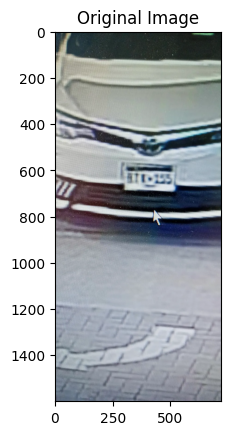

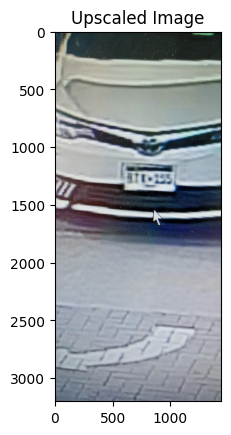

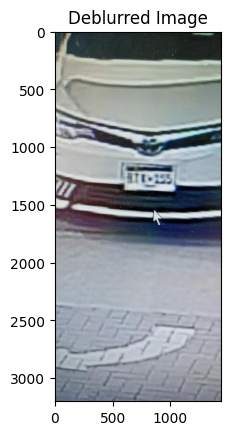

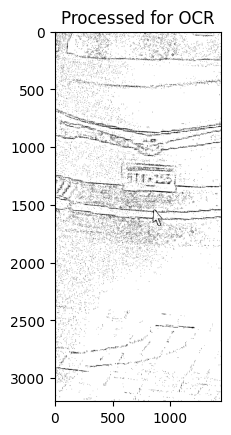

Detected Number Plate: ree en he tele 8 OT EERE seei te”
Ee ee a — . wher tans hte a “or res ‘ eee z we
eR MUTE, TSR GE Se ee OE Tee tase
havea MAES A Ya ME bos
Ose gh Ene where Fou GRIN tas Ata eh Sede can Te we
Reena B pe tee : > “Bat rd ne SO eo re ae
Wane te \ mom my Sy ant “ou a ie TPS WAR “eelnts wei
ie Qieg dS tase SME PB hap ele sy va eT: aa
ee : . . n “het we . wea, ae ate at i we
ole Same. | Peta tite Be DA ERS aE RPT me a
me Pe tae at Pe ee gt a a ee pacnrdWinbe! wittccal, geet ies eter pete
KP gen “Fear PRG A en Serf ineecbaay, mir cogent ps UE MEE Ere SST TEMS . . .
ne be ieee
pa ee eae eD A ae Net : . . :
“yn mt Bea ben ae et de
a vm ty . Lory gl Nera
Pe agai tn so woos. ht td ear Pet Sep OE eo
RY cP Ors Ayehiie sp a . Bee dea MEIN I ”
wot ER Stn TEE ER EE Aimar renty eens peat: ET, RE shoe :
erat SAT ayo, ' :
patel ee S "
" okies tn ear! no tea .
SUP Pe Diary eth 0} ms
pia . ns : hp oet ot ‘
Uwe” sod tee TE ' . -
ee ime: re wate . . :
an “aL OT Pye ao ree . . : "
oe ae E

In [11]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Load the image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# ### Step 2: Upscale the Image (Super-Resolution)
def upscale_image(image, scale_factor=2):
    # Use cv2 INTER_CUBIC for high-quality upscaling
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Upscale the image by 2x
upscaled_img = upscale_image(img, scale_factor=2)
plt.imshow(cv2.cvtColor(upscaled_img, cv2.COLOR_BGR2RGB))
plt.title('Upscaled Image')
plt.show()

# ### Step 3: Deblurring the Image
def deblur_image(image):
    # Apply Gaussian blur for deblurring
    deblurred_img = cv2.GaussianBlur(image, (5, 5), 0)
    return deblurred_img

# Deblur the image
deblurred_img = deblur_image(upscaled_img)
plt.imshow(cv2.cvtColor(deblurred_img, cv2.COLOR_BGR2RGB))
plt.title('Deblurred Image')
plt.show()

# ### Step 4: Enhanced Preprocessing and OCR Detection

def detect_number_plate(image):
    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adaptive Thresholding (to handle different lighting conditions)
    adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    # Apply Morphological operations to remove noise
    kernel = np.ones((3,3),np.uint8)
    morph_img = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Show processed image (optional)
    plt.imshow(morph_img, cmap='gray')
    plt.title('Processed for OCR')
    plt.show()

    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(morph_img, config='--psm 6')  # Try psm 6 or psm 8

    return text.strip()

# Detect number plate
detected_text = detect_number_plate(deblurred_img)
print('Detected Number Plate:', detected_text)


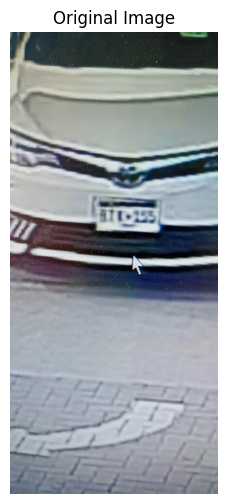

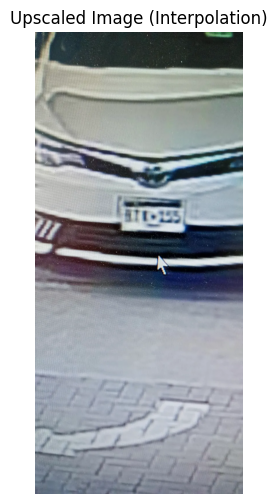

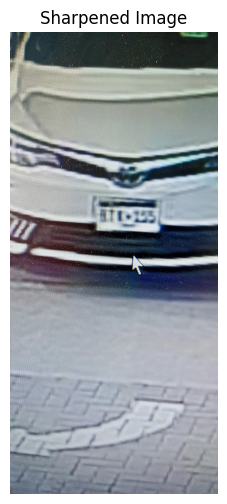

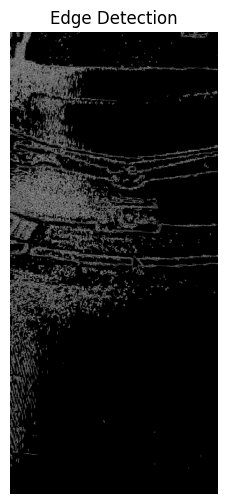

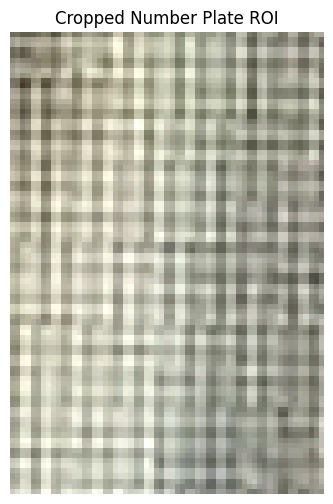

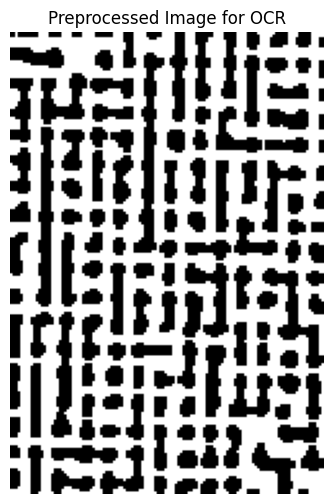

Detected Number Plate: 


In [12]:
# Import necessary libraries
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Install pytesseract if not already installed
# Note: These commands are for Jupyter notebooks. If running in a different environment, execute them appropriately.
# !sudo apt-get update
# !sudo apt-get install tesseract-ocr
# !pip install pytesseract

# Set Tesseract command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path based on your system

# Function to display images
def display_image(img, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the Image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image at path '{image_path}' not found.")
else:
    display_image(img, 'Original Image')

    # Step 2: Upscale the Image using Super-Resolution
    # Option 1: Simple Interpolation (Baseline)
    def upscale_image_interpolation(image, scale_factor=2):
        return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

    upscaled_img = upscale_image_interpolation(img, scale_factor=2)
    display_image(upscaled_img, 'Upscaled Image (Interpolation)')

    # Option 2: Using Super-Resolution (Optional)
    # Uncomment the following lines if you have OpenCV's DNN Super-Resolution models
    """
    def upscale_image_super_resolution(image, model_path='EDSR_x2.pb'):
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        sr.readModel(model_path)
        sr.setModel("edsr", 2)  # Using EDSR model with scale factor 2
        return sr.upsample(image)

    # Ensure you have downloaded the EDSR model and provide the correct path
    super_res_img = upscale_image_super_resolution(img, model_path='EDSR_x2.pb')
    display_image(super_res_img, 'Upscaled Image (Super Resolution)')
    """

    # For this example, we'll proceed with the interpolated upscaled image
    # Step 3: Deblurring the Image using Sharpening Filter
    def sharpen_image(image):
        # Define sharpening kernel
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        sharpened = cv2.filter2D(image, -1, kernel)
        return sharpened

    sharpened_img = sharpen_image(upscaled_img)
    display_image(sharpened_img, 'Sharpened Image')

    # Step 4: Detect and Crop ROI (Number Plate)
    def detect_number_plate_roi(image):
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply bilateral filter to reduce noise while keeping edges sharp
        gray_filtered = cv2.bilateralFilter(gray, 11, 17, 17)
        # Edge detection
        edged = cv2.Canny(gray_filtered, 30, 200)
        display_image(edged, 'Edge Detection')

        # Find contours based on edges detected
        contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
        screen_cnt = None

        # Loop over contours to find a quadrilateral
        for cnt in contours:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.018 * peri, True)
            if len(approx) == 4:
                screen_cnt = approx
                break

        if screen_cnt is None:
            print("No contour detected that resembles a number plate.")
            return image  # Return the original image if no contour is found

        # Masking the part other than the number plate
        mask = np.zeros(gray.shape, np.uint8)
        cv2.drawContours(mask, [screen_cnt], 0, 255, -1)
        cv2.bitwise_and(image, image, mask=mask)
        (x, y) = np.where(mask == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))
        cropped = image[topx:bottomx+1, topy:bottomy+1]
        display_image(cropped, 'Cropped Number Plate ROI')
        return cropped

    roi_img = detect_number_plate_roi(sharpened_img)

    # Step 5: Further Preprocessing for OCR
    def preprocess_for_ocr(image):
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize to make it larger
        gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
        # Apply bilateral filter
        gray = cv2.bilateralFilter(gray, 11, 17, 17)
        # Adaptive Thresholding
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 31, 2)
        # Morphological Operations
        kernel = np.ones((3,3), np.uint8)
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        display_image(morph, 'Preprocessed Image for OCR')
        return morph

    preprocessed_img = preprocess_for_ocr(roi_img)

    # Step 6: OCR Configuration and Detection
    def detect_number_plate_text(image):
        # Define custom configuration for tesseract
        custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        text = pytesseract.image_to_string(image, config=custom_config)
        return text.strip()

    detected_text = detect_number_plate_text(preprocessed_img)
    print('Detected Number Plate:', detected_text)


In [ ]:
# Import necessary libraries
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Install pytesseract if not already installed
# Set Tesseract command path (Update this path based on your system)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Function to display images
def display_image(img, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the Image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image at path '{image_path}' not found.")
else:
    # Step 2: Display the image and allow user to manually crop ROI (Number Plate Area)
    print("Select the number plate area and press Enter or Space to confirm")
    roi = cv2.selectROI("Select Number Plate", img, showCrosshair=True)

    # Close the ROI window after selection
    cv2.destroyWindow("Select Number Plate")

    # Step 3: Crop the selected ROI
    if roi is not None:
        # Extract the region of interest (ROI) using the selected coordinates
        x, y, w, h = roi
        cropped_img = img[int(y):int(y+h), int(x):int(x+w)]
        display_image(cropped_img, 'Cropped Number Plate ROI')

        # Step 4: Preprocessing for OCR
        def preprocess_for_ocr(image):
            # Convert to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Resize to make it larger
            gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
            # Apply bilateral filter
            gray = cv2.bilateralFilter(gray, 11, 17, 17)
            # Adaptive Thresholding
            thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 31, 2)
            # Morphological Operations
            kernel = np.ones((3,3), np.uint8)
            morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            display_image(morph, 'Preprocessed Image for OCR')
            return morph

        preprocessed_img = preprocess_for_ocr(cropped_img)

        # Step 5: OCR Configuration and Detection
        def detect_number_plate_text(image):
            # Define custom configuration for tesseract
            custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
            text = pytesseract.image_to_string(image, config=custom_config)
            return text.strip()

        detected_text = detect_number_plate_text(preprocessed_img)
        print('Detected Number Plate:', detected_text)
    else:
        print("No ROI selected. Exiting.")


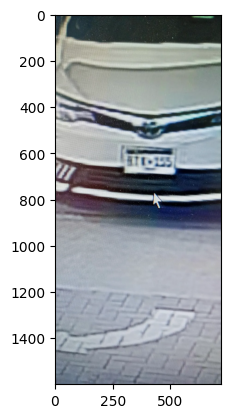

KeyboardInterrupt: Interrupted by user

In [2]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
from matplotlib.widgets import RectangleSelector
from PIL import Image

# Set Tesseract command path (Update this path based on your system)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Function to display images
def display_image(img, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the Image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image at path '{image_path}' not found.")
else:
    # Step 2: Initialize global variable for the cropped region
    global roi_coords
    roi_coords = None

    # Step 3: Define a callback function for ROI selection
    def line_select_callback(eclick, erelease):
        global roi_coords
        # Get the coordinates for ROI
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        roi_coords = (int(x1), int(y1), int(x2), int(y2))
        print(f"ROI Selected: {roi_coords}")

    # Step 4: Create the Rectangle Selector widget for ROI selection
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # rect_selector = RectangleSelector(ax, line_select_callback,
    #                                   drawtype='box', useblit=True,
    #                                   button=[1], minspanx=5, minspany=5,
    #                                   spancoords='pixels', interactive=True)
    # Corrected initialization of RectangleSelector
    rect_selector = RectangleSelector(ax, line_select_callback,
                                  interactive=True, useblit=True,
                                  button=[1], minspanx=5, minspany=5,
                                  spancoords='pixels')
    plt.show()

    # Step 5: Wait for the user to select the ROI and confirm
    input("Press Enter after selecting the ROI...")

    if roi_coords:
        # Step 6: Crop the selected ROI
        x1, y1, x2, y2 = roi_coords
        cropped_img = img[y1:y2, x1:x2]
        display_image(cropped_img, 'Cropped Number Plate ROI')

        # Step 7: Preprocessing for OCR
        def preprocess_for_ocr(image):
            # Convert to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Resize to make it larger
            gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
            # Apply bilateral filter
            gray = cv2.bilateralFilter(gray, 11, 17, 17)
            # Adaptive Thresholding
            thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 31, 2)
            # Morphological Operations
            kernel = np.ones((3, 3), np.uint8)
            morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            display_image(morph, 'Preprocessed Image for OCR')
            return morph

        preprocessed_img = preprocess_for_ocr(cropped_img)

        # Step 8: OCR Configuration and Detection
        def detect_number_plate_text(image):
            # Define custom configuration for tesseract
            custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
            text = pytesseract.image_to_string(image, config=custom_config)
            return text.strip()

        detected_text = detect_number_plate_text(preprocessed_img)
        print('Detected Number Plate:', detected_text)
    else:
        print("No ROI selected. Exiting.")


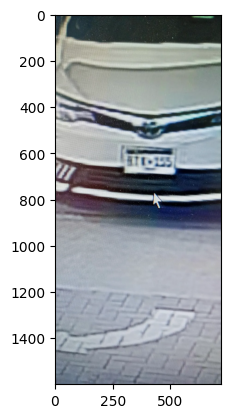

In [4]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
from matplotlib.widgets import RectangleSelector
from PIL import Image

# Set Tesseract command path (Update this path based on your system)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Function to display images
def display_image(img, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the Image
image_path = "/content/retouched.jpeg"  # Update with your image path
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image at path '{image_path}' not found.")
else:
    # Step 2: Initialize global variable for the cropped region
    global roi_coords
    roi_coords = None

    # Step 3: Define a callback function for ROI selection
    def line_select_callback(eclick, erelease):
        global roi_coords
        # Get the coordinates for ROI
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        roi_coords = (int(x1), int(y1), int(x2), int(y2))
        print(f"ROI Selected: {roi_coords}")

        # Automatically proceed with the rest of the processing after selection
        if roi_coords:
            x1, y1, x2, y2 = roi_coords
            cropped_img = img[y1:y2, x1:x2]
            display_image(cropped_img, 'Cropped Number Plate ROI')

            # Step 7: Preprocessing for OCR
            preprocessed_img = preprocess_for_ocr(cropped_img)

            # Step 8: OCR Detection
            detected_text = detect_number_plate_text(preprocessed_img)
            print('Detected Number Plate:', detected_text)

    # Step 4: Create the Rectangle Selector widget for ROI selection
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    rect_selector = RectangleSelector(ax, line_select_callback,
                                      interactive=True, useblit=True,
                                      button=[1], minspanx=5, minspany=5,
                                      spancoords='pixels')
    plt.show()

# Step 7: Preprocessing for OCR
def preprocess_for_ocr(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize to make it larger
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    # Apply bilateral filter
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    # Adaptive Thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 31, 2)
    # Morphological Operations
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    display_image(morph, 'Preprocessed Image for OCR')
    return morph

# Step 8: OCR Detection
def detect_number_plate_text(image):
    # Define custom configuration for tesseract
    custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(image, config=custom_config)
    return text.strip()

